# Clustering

![so easy for us](https://uploads.toptal.io/blog/image/92521/toptal-blog-image-1463639098844-eb9ad14c7f665e556b2cb66a65b6c257.jpg)

(image: [toptal](https://www.toptal.com/machine-learning/clustering-algorithms))

# Topics
- Supervised vs. Unsupervised learning
- K means
- Gaussian Mixture Model
- DBSCAN

## Where are we?

![yay, one more quadrant covered](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

## Supervised / Unsupervised Learning

Unsupervised learning:
- Just dataset, no targets or labels
- Algorithm needs to "make sense" of the data itself
- E.g. clustering, dimension reduction

Supervised learning:
- Dataset with targets or labels
- Algorithm learns by minimizing loss against the targets / labels
- E.g. Classification, regression

![supervised vs unsupervised](assets/clustering/supervised_unsupervised.png)

(image: [Vibhor Agarwal](https://medium.com/@agarwalvibhor84/getting-started-with-machine-learning-using-sklearn-python-7d165618eddf))

## Clustering

Objective: given a dataset with just features, find groups (or clusters) of them

Broad applications:
- Market segmentation
- User recommendations
- Anormaly detection

https://en.wikipedia.org/wiki/Cluster_analysis#Applications

## Algorithms

- K-means / K-modes
- Expectation Maximization / Gaussian Mixture
- DBSCAN

Comparison:
http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

## K-means

- Divides $N$ samples into $K$ clusters $C$
  - Each cluster is centered on a mean $\mu_j$, known as a "centroid"
- Objective is to minimize "inertia" (= within-cluster sum-of-squares)

$$\sum_{i=0}^n \underset{\mu_j \in C} {\arg \min}{(\|x_i - \mu_j\|^2)}$$

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## Workshop: K-means clustering

### Dataset: COE Bidding Results

https://data.gov.sg/dataset/coe-bidding-results

1. Download the dataset on your machine
2. Extract into a folder and note the path for use in `pd.read_csv`

In [2]:
import pandas as pd

df = pd.read_csv('D:/tmp/coe-bidding-results/coe-results.csv', # fix to your path
                 usecols=['month', 'vehicle_class', 'quota', 'premium'],
                 parse_dates=['month'])

df.month

0     2010-01-01
1     2010-01-01
2     2010-01-01
3     2010-01-01
4     2010-01-01
5     2010-01-01
6     2010-01-01
7     2010-01-01
8     2010-01-01
9     2010-01-01
10    2010-02-01
11    2010-02-01
12    2010-02-01
13    2010-02-01
14    2010-02-01
15    2010-02-01
16    2010-02-01
17    2010-02-01
18    2010-02-01
19    2010-02-01
20    2010-03-01
21    2010-03-01
22    2010-03-01
23    2010-03-01
24    2010-03-01
25    2010-03-01
26    2010-03-01
27    2010-03-01
28    2010-03-01
29    2010-03-01
         ...    
955   2017-12-01
956   2017-12-01
957   2017-12-01
958   2017-12-01
959   2017-12-01
960   2018-01-01
961   2018-01-01
962   2018-01-01
963   2018-01-01
964   2018-01-01
965   2018-01-01
966   2018-01-01
967   2018-01-01
968   2018-01-01
969   2018-01-01
970   2018-02-01
971   2018-02-01
972   2018-02-01
973   2018-02-01
974   2018-02-01
975   2018-02-01
976   2018-02-01
977   2018-02-01
978   2018-02-01
979   2018-02-01
980   2018-03-01
981   2018-03-01
982   2018-03-

In [3]:
# Check that the month is read correctly (should be datetime64[ns])
df.dtypes

month            datetime64[ns]
vehicle_class            object
quota                     int64
premium                   int64
dtype: object

In [4]:
# Get a subset of dates where the distribution is less variable
df = df[(df.month >= '2016') & (df.month < '2017') ]

In [6]:
# see how many entries, and their ranges
df.describe()

,quota,premium
count,120.000000,120.000000
mean,875.858333,41509.191667
std,702.687928,18090.047866
min,162.000000,6012.000000
25%,359.250000,43751.250000
50%,449.500000,48152.000000
75%,1394.500000,52751.000000
max,2272.000000,58201.000000


### Task

1. Find clusters using the `quota`, and `premium` columns.

2. Compare the clusters found with the actual `vehicle_class` label

*Note: in unsupervised learning, we DON'T provide the label for training the algorithm*

### Data Processing

1. Take the last 300 samples for demo purposes
2. Encode labels from ['Category A', ...] to [0, 1, 2, ...]
3. Shuffle and split the data into train and test
4. Scale the data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For demo purposes, use the first 300 samples
n_samples = 300
df = df.iloc[:n_samples]

df_data = df.loc[:, 'quota':'premium']

# Encode labels
le = LabelEncoder()
df_labels = le.fit_transform(df.loc[:, 'vehicle_class'])

# Train, test split, and shuffle
df_data_train, df_data_test, df_labels_train, df_labels_test = train_test_split(df_data, df_labels)

# Scale the data to simplify processing
scaler = StandardScaler()
scaler.fit(df_data_train)
df_data_train_scaled = scaler.transform(df_data_train)
df_data_test_scaled = scaler.transform(df_data_test)

print('Labels\n', df_labels_train[:5])
print('Data\n', df_data_train_scaled[:5])

Labels
 [0 3 3 3 4]
Data
 [[ 1.47703959  0.53643729]
 [-0.82689354 -2.08663262]
 [-0.79311153 -2.09239646]
 [-0.87418835 -2.08313939]
 [-0.69717062  0.84983866]]


### Helper functions

Here's a helper function to visualize the k-means algorithm.

It does this:
1. For the min-max ranges of `quota` and `premium` (after scaling), run `Kmeans.predict` to get the label outputs [0, 1, 2, 3, 4] (for 5 categories)
2. Plot a colour mesh, with colour assigned to each label
3. Scatter plot the training data in black
4. Scatter plot the centroids in red

In [8]:
import numpy as np

def plot_decision_boundaries(ax, title, kmeans_model, data):
    """Plots the decision boundaries for a fitted k-means model
    Args:
        ax: subplot axis
        title: subplot title
        kmeans_model: a fitted sklearn.cluster.KMeans model
        data: 2-dimensional input data to cluster and plot
 
    Based on: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the trained model.
    Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    ax.imshow(Z, interpolation='nearest',
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              cmap=plt.cm.Pastel2,
              aspect='auto', origin='lower')

    ax.plot(data[:, 0], data[:, 1], 'k.', markersize=4)

    # Plot the centroids as a red X
    centroids = kmeans.cluster_centers_

    ax.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=169, linewidths=3,
               color='red', zorder=10, label='centroids')
    ax.set(title=title,
           xlim=(x_min, x_max), ylim=(y_min, y_max),
           xticks=(), yticks=())
    ax.legend()

### Train and plot progress

Now we'll run k-means with different iterations.

Observe how the centroids move as the algorithm makes progress.

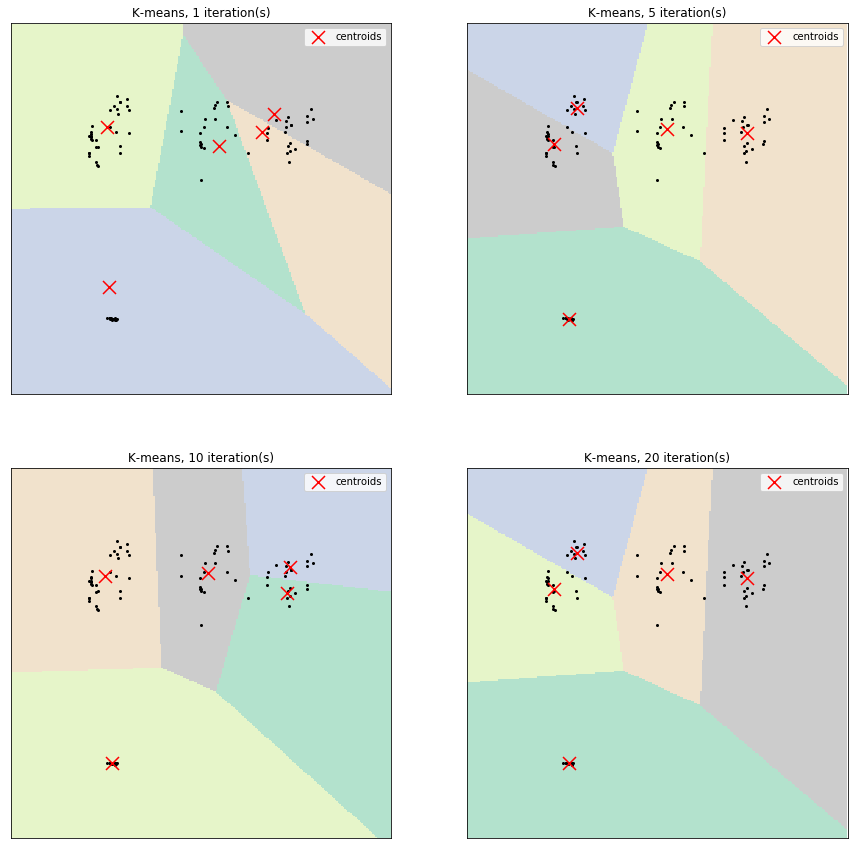

In [9]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Run k-means iteratively and plot to demonstrate the algorithm at work
n_classes = len(df.loc[:, 'vehicle_class'].unique())
n_iterations = [1, 5, 10, 20]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for n, ax in zip(n_iterations, axes.flatten()):
    kmeans = KMeans(init='random', n_clusters=n_classes, max_iter=n, n_init=1)
    kmeans.fit(df_data_train_scaled)
    plot_decision_boundaries(ax, 'K-means, %d iteration(s)' % n, kmeans, df_data_train_scaled)

### Exercise

Repeat the above, trying different options for k-means:
1. Try a different initialization method: `k-means++`
2. Try averaging over different centroid seeds by setting `n_init` to a number greater than 1
3. Try a different algorithm: `full`, `elkan`

You can run `KMeans?` to see its documentation.

In [ ]:
# Your code here














## Evaluating Clustering Algorithms

When you have the ground truth labels:
- Homogeniety: each cluster contains only members of 1 class
- Completeness: all members of 1 class are assigned to the same cluster
- V-measure: harmonic mean of homogeniety and completeness
$$v\_measure = \frac{2 * homogeniety * completeness}{homogeniety+completeness}$$
- Adjusted Rand index: similarity measure, ignoring ordering

## Evaluating Clustering Algorithms

When you don't have the ground truth labels:
- Silhouette Coefficient

$$S = \frac{b-a}{max(a, b)}$$

Where:
- $a$: Mean distance between 1 sample and others in same class
- $b$: Mean distance between 1 sample and others in nearest clusters

## Evaluating Clustering Algorithms

Advantages and disadvantages of each metric:
http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

## Workshop: Evaluating K-means on the COE dataset

Since we have our labels, we can evaluate the performance of the clustering algorithm using all of the above.

Higher numbers are better.

In [10]:
from sklearn import metrics

# Let's run to the maximum iterations
kmeans = KMeans(init='random', n_clusters=n_classes, max_iter=100, n_init=1)
kmeans.fit(df_data_train_scaled)

# Run prediction on the test data
test_labels_predict = kmeans.predict(df_data_test_scaled)
test_labels_predict

array([2, 2, 0, 0, 0, 2, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 3, 0, 2, 2,
       3, 2, 0, 2, 2, 3, 2, 2])

In [11]:
print("Homogeneity: %0.3f"
      % metrics.homogeneity_score(df_labels_test, test_labels_predict))
print("Completeness: %0.3f"
      % metrics.completeness_score(df_labels_test, test_labels_predict))
print("V-measure: %0.3f"
      % metrics.v_measure_score(df_labels_test, test_labels_predict))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(df_labels_test, test_labels_predict))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_data_test_scaled, test_labels_predict,
                                 sample_size=n_samples,
                                 metric='euclidean'))

Homogeneity: 0.689
Completeness: 1.000
V-measure: 0.816
Adjusted Rand-Index: 0.636
Silhouette Coefficient: 0.804


### Exercise
Compare the Evaluation Metrics for the different k-means settings you tried in the earlier exercise. 

- A different initialization method: k-means++
- Averaging over different centroid seeds by setting n_init to a number greater than 1
- A different algorithm: full, elkan

Use max_iter = 100 or a similar value.

Which combination performs the best on this dataset?

In [12]:
# Your code here












## Gaussian Mixture Models

Gaussian mixture models use the normal distribution
- Means are centered around clusters
- Assigns probabilities that a sample belongs to a cluster

http://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture

### Multivariate Gaussians

This section provides more background on Multivariate Gaussian distributions.

### Univariate Gaussian

First, the univariate (i.e. single variable) Gaussian or normal distribution:

$$
\mathcal{N}(x: \mu, \sigma) = {\frac {1}{\sqrt {2\pi \sigma ^{2}}}}exp\bigl[{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\bigr]
$$

mean: $$\mu = \frac{1}{N}\sum_{i}^{N}{x_i}$$

variance: $$\sigma^2 = \frac{1}{N}\sum_{i}^{N}{(x_i - \mu)}^2$$

In [187]:
import numpy as np
def gaussian(x, mean, sigma):
    """Generages a 1D Gaussian distribution
    Args:
        x: range to generate
        mean: mean of the gaussian distribution
        sigma: standard deviation of the gaussian distribution
    Return:
        the gaussian distribution
    """
    return np.exp(-np.square(x-mean)/2*sigma**2)/(np.sqrt(2*np.pi*sigma**2))

def plot_gaussian_1d(x, mean, sigma):
    """Plots a 1D Gaussian distribution
    Args:
        x: plotting range
        mean: mean of the gaussian distribution
        sigma: standard deviation of the gaussian distribution
    """
    f = gaussian(x, mean, sigma)
    fig, ax = plt.subplots()
    ax.plot(x, f)
    ax.set(title='1D gaussian, $\mu$: %.2f, $\sigma$: %.2f' % (mean, sigma),
           xlabel='x', ylabel='Gaussian')
    ax.grid()
    plt.show()

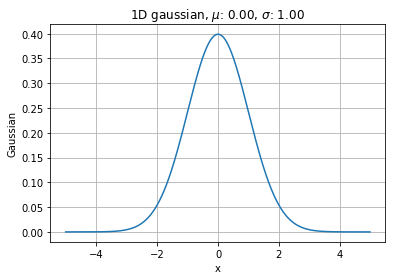

In [188]:
x = np.arange(-5, 5, .01)
mean = 0 # centre of the gaussian
sigma = 1 # inversely proportional to the width

plot_gaussian_1d(x, mean, sigma)

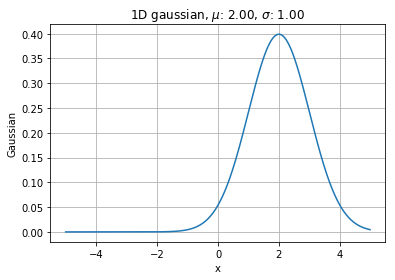

In [189]:
x = np.arange(-5, 5, .01)
mean = 2 # centre of the gaussian
sigma = 1 # inversely proportional to the width

plot_gaussian_1d(x, mean, sigma)

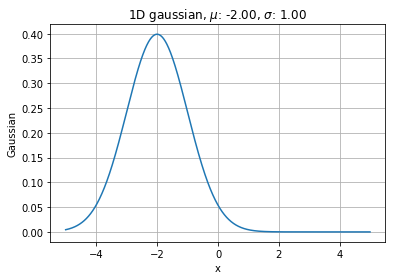

In [190]:
x = np.arange(-5, 5, .01)
mean = -2 # centre of the gaussian
sigma = 1 # inversely proportional to the width

plot_gaussian_1d(x, mean, sigma)

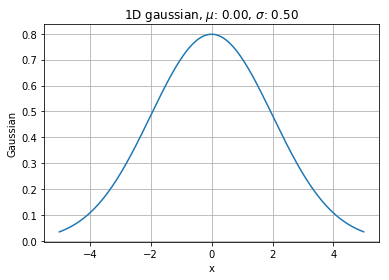

In [191]:
x = np.arange(-5, 5, .01)
mean = 0 # centre of the gaussian
sigma = 0.5 # inversely proportional to the width

plot_gaussian_1d(x, mean, sigma)

### Multivariate Gaussian

$$
\mathcal{N}(\vec{x}: \vec{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d|\Sigma|}}exp\bigl[-\frac{1}{2}(\vec{x} - \vec{\mu})^T\Sigma^{-1}(\vec{x} - \vec{\mu})\bigr]
$$

Mean vector (length d): $$\vec{\mu} = \frac{1}{N}\sum_{i=1}^{N}{\vec{x}_i}$$

Covariance matrix (d x d): $$\Sigma = \frac{1}{N}\sum_{j}^N(\vec{x}_i - \vec{\mu})^T(\vec{x}_i - \vec{\mu})$$


#### Compare (Univariate case):

$$
\mathcal{N}(x: \mu, \sigma) = {\frac {1}{\sqrt {2\pi \sigma ^{2}}}}exp\bigl[{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\bigr]
$$

mean: $$\mu = \frac{1}{N}\sum_{i=1}^{N}{x_i}$$

variance: $$\sigma^2 = \frac{1}{N}\sum_{i=1}^{N}{(x_i - \mu)}^2$$

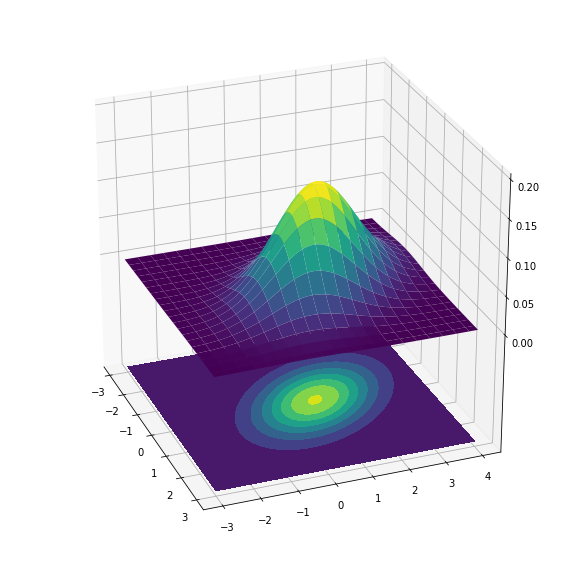

In [197]:
# https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/
from scipy.stats import multivariate_normal

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1,
                cmap=plt.cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=plt.cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

## Covariance Matrix Types

The covariance matrix type controls how the gaussian models are "mixed" together.

- Spherical: all components have spherical covariance matrices
- Diagonal: each component has its own axis-aligned covariance matrix
- Tied: all components have the same covariance matrix
- Full: all components can have different covariance matrix

Visualization:
http://www.stats.ox.ac.uk/~sejdinov/teaching/dmml/Mixtures.html

## Workshop: Gaussian Mixture Model on the COE dataset

In this workshop, we will apply GMMs to cluster the COE dataset.

In [120]:
# Credits: https://github.com/scikit-learn/scikit-learn/blob/master/examples/mixture/plot_gmm_pdf.py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture

def plot_gmm(ax, title, gmm, data):
    """Plots a Gaussian Mixture Model as a contour plot
    Args:
        ax: subplot axis
        title: plot title
        gmm: fitted Gaussian Mixture Model
        data: data samples
    """
    h = 0.1
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # negative log-likelihood scores for each point in the mesh
    # using the trained model
    Z = -gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # https://matplotlib.org/2.0.1/examples/pylab_examples/contour_demo.html    
    cax = ax.contour(xx, yy, Z, 
                     levels=np.logspace(0, 3, 10),
                     colors=('red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'))

    plt.colorbar(cax, shrink=0.8, extend='both', ax=ax)
    ax.scatter(data[:, 0], data[:, 1], color='black', marker='x')
    
    # plot the means (centers of the 5 Gaussian components)
    means = gmm.means_
    ax.scatter(means[:, 0], means[:, 1], marker='x',
               s=169, linewidths=3, color='red', zorder=10, label='Gaussian means')
    
    ax.legend(loc='lower right')
    ax.set(title=title, xlim=(x_min, x_max), ylim=(y_min, y_max))

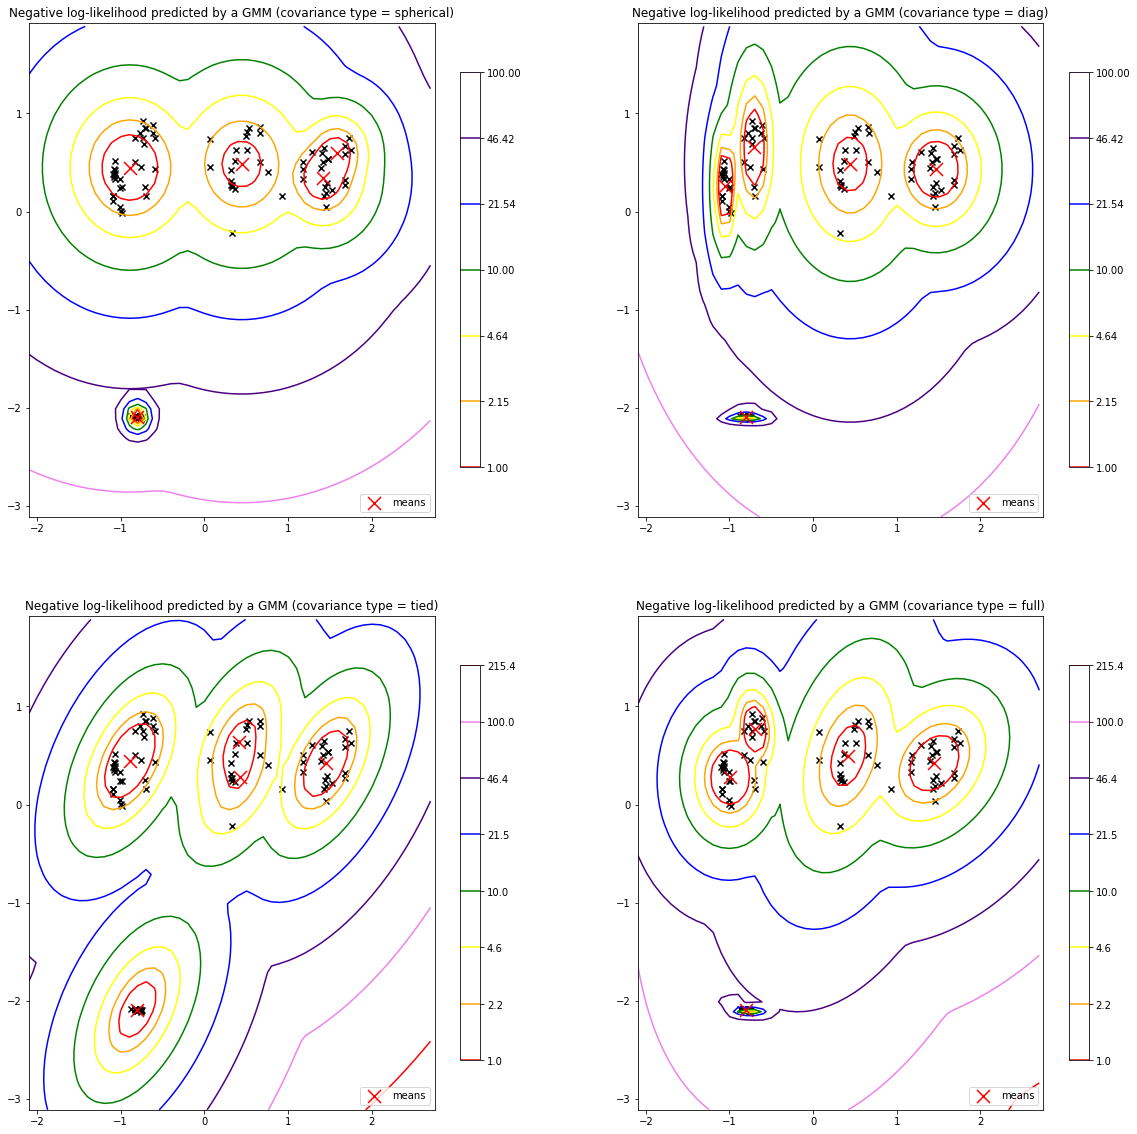

In [121]:
%matplotlib inline
n_classes = len(df.loc[:, 'vehicle_class'].unique())

covariance_types = ['spherical', 'diag', 'tied', 'full']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

for cov_type, ax in zip(covariance_types, axes.flatten()):
    gmm = GaussianMixture(n_components=n_classes, covariance_type=cov_type)
    gmm.fit(df_data_train_scaled)
    plot_gmm(ax, 'Negative log-likelihood predicted by a GMM (covariance type = %s)' % cov_type,
             gmm, df_data_train_scaled)

In [129]:
def plot_gmm_3d(ax, title, gmm, data):
    """Plots a Gaussian Mixture Model as a 3D plot
    Args:
        ax: subplot axis
        title: plot title
        gmm: fitted Gaussian Mixture Model
        data: data samples
    """
    h = 0.1
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # negative log-likelihood scores for each point in the mesh
    # using the trained model
    score = gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])    
    Z = score.reshape(xx.shape)
    z_min, z_max = score.min() - 1, score.max() + 1    
    
    colors = ('red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet')
    
    ax.plot_surface(xx, yy, Z, rstride=8, cstride=8, alpha=0.3)
    
    # use -Z to match the 2D plot
    cax = ax.contour(xx, yy, -Z, zdir='z', offset=z_min, levels=np.logspace(0, 3, 10),
                     colors=colors)
    ax.contour(xx, yy, Z, zdir='x', offset=x_min, cmap=plt.cm.spring)
    ax.contour(xx, yy, Z, zdir='y', offset=y_min, cmap=plt.cm.autumn)

    # plot the scatter points
    ax.scatter(data[:, 0], data[:, 1], z_min, color='black', marker='x')

    # plot the means (centers of the 5 Gaussian components)
    means = gmm.means_
    ax.scatter(means[:, 0], means[:, 1], z_min, marker='x',
               s=169, linewidths=3, color='red', zorder=100,
               label='Gaussian means')
    
    plt.colorbar(cax, shrink=0.8, extend='both', ax=ax)
    
    ax.set_xlabel('quota scaled')
    ax.set_xlim(x_min, x_max)
    ax.set_ylabel('premium scaled')
    ax.set_ylim(y_min, y_max)
    ax.set_zlabel('log likelihood')
    ax.set_zlim(z_min, z_max)
    ax.legend()

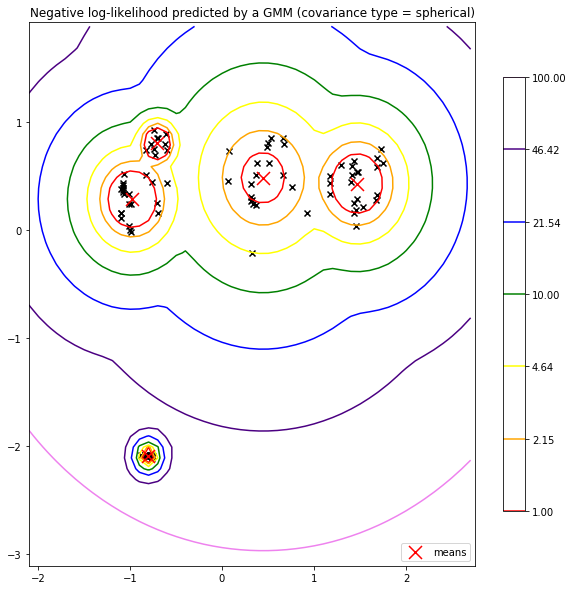

In [130]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

cov_type = 'spherical'
gmm = GaussianMixture(n_components=5, covariance_type=cov_type)
gmm.fit(df_data_train_scaled)
plot_gmm(ax, 'Negative log-likelihood predicted by a GMM (covariance type = %s)' % cov_type,
         gmm, df_data_train_scaled)

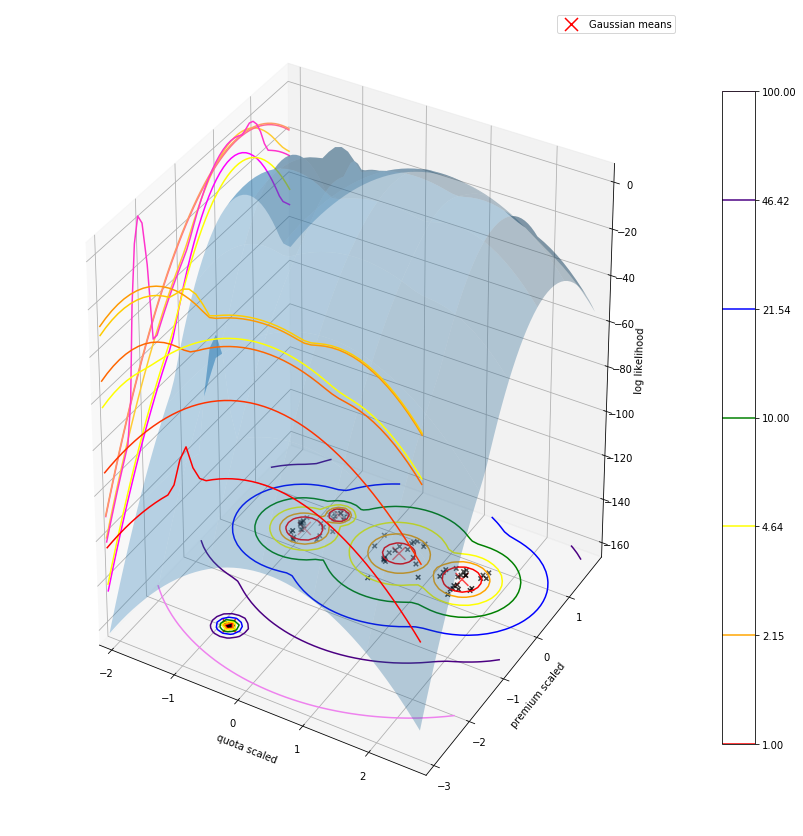

In [131]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

cov_type = 'spherical'
gmm = GaussianMixture(n_components=5, covariance_type=cov_type)
gmm.fit(df_data_train_scaled)
plot_gmm_3d(ax, 'Negative log-likelihood predicted by a GMM (covariance type = %s)' % cov_type,
         gmm, df_data_train_scaled)

In [67]:
from sklearn.metrics import silhouette_score

covariance_types = ['spherical', 'diag', 'tied', 'full']

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=n_classes, covariance_type=cov_type)
    gmm.fit(df_data_train_scaled)

    pred = gmm.predict(df_data_test_scaled)
    pred_probabilities = gmm.predict_proba(df_data_test_scaled)
    
    print(gmm)
    print(silhouette_score(df_data_test_scaled, pred))
    print(gmm.means_)
    print("----Test data points----")

    for cluster, prob in zip(pred, pred_probabilities):
        print(cluster)
        print(prob)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=5, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)
0.6443828577984924
[[-0.97687316  0.251997  ]
 [ 0.68404294  0.55597144]
 [-0.71524152 -2.01342332]
 [ 1.7492597   0.40253924]
 [-0.59963742  0.60522054]]
----Test data points----
1
[3.86360813e-46 9.99999906e-01 0.00000000e+00 7.70426196e-09
 8.58180770e-08]
3
[1.55459495e-121 6.87970917e-002 0.00000000e+000 9.31202908e-001
 1.08686398e-023]
0
[7.15966145e-01 9.74663679e-09 0.00000000e+00 7.10889900e-40
 2.84033845e-01]
2
[6.70827997e-113 1.27146481e-028 1.00000000e+000 1.26742608e-067
 2.01994180e-042]
2
[2.15033768e-113 1.08757983e-028 1.00000000e+000 8.87269491e-068
 1.45909025e-042]
2
[1.17763280e-112 1.21474624e-027 1.00000000e+000 1.49005441e-065
 8.92434390e-042]
1
[3.06861147e-62 9.999993

### Exercise: Evaluation metrics and Spherical plots for GMM

A contour plot is useful for visualizing the shape of a Gaussian Mixture Model, because it shows the probability distributions for each class.

For clustering purposes, if we don't care so much about the probabilities, we can do spherical plots instead.

1. Complete the `get_metrics` helper function to get the evaluation metrics for each GMM covariance type.
2. Which model will you choose, based on the evaluation metrics?

In [57]:
from matplotlib.patches import Ellipse

def get_gmm_cov_matrix(gmm, label):
    """Returns the covariance matrix
    Args:
        gmm: the Gaussian Mixture Model
        label: the label index
    Returns:
        the covariance matrix

    Credits: http://www.stats.ox.ac.uk/~sejdinov/teaching/dmml/Mixtures.html
    """
    if gmm.covariance_type == 'full':
        # one per label (of any type)
        cov = gmm.covariances_[label]
    elif gmm.covariance_type == 'tied':
        # all the same
        cov = gmm.covariances_
    elif gmm.covariance_type == 'diag':
        # diagonal matrix per label
        cov = np.diag(gmm.covariances_[label])
    elif gmm.covariance_type == 'spherical':
        # all spherical
        cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[label]
    return cov
    
def plot_cov_ellipse(cov, pos, color='b', ax=None, **kwargs):
    """Plots the covariance ellipse
    Args:
        cov: the covariance to plot
        pos: the position
        color: the ellipse color
        ax: the subplot axis
    Returns:
        the ellipse

    Credits: http://www.stats.ox.ac.uk/~sejdinov/teaching/dmml/Mixtures.html
    """

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    nstd = 2 # ???

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=color, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

In [ ]:
from sklearn import metrics

def get_metrics(model, test_data, test_labels):
    """Returns the cluster evaluation metrics
    Args:
        model - the model
        test_data - the test dataset
        test_labels - the test labels
    Returns:
        a tuple of (homogeniety_score, completeness_score
        v_measure_score, adjusted_rand_score, silhouette_score)    
    """
    # Your code here

    
    
    
    
    
    
    
    
    
    
    
    
    
    


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20),
                        sharex=True, sharey=True)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, n_classes)]

covariance_types = ['spherical', 'diag', 'tied', 'full']

for cov_type, ax in zip(covariance_types, axes.flatten()):
    gmm = GaussianMixture(n_components=n_classes, covariance_type=cov_type)
    gmm.fit(df_data_train_scaled)
    ax.scatter(df_data_train_scaled[:, 0], df_data_train_scaled[:, 1],
               color='black', marker='x')

    homogeneity, completeness, vmeasure, adjusted_rand, silhouette = \
        get_metrics(gmm, df_data_test_scaled, df_labels_test)    

    for label, color in enumerate(colors):
        cov = get_gmm_cov_matrix(gmm, label)                
        position = gmm.means_[label]
        plot_cov_ellipse(cov, position, color=color, ax=ax)
    
    ax.set(title='GMM with \'%s\' covariance\n'
           'homogeneity %.2f, completeness %.2f, v-measure %.2f\n'
           'adjusted rand score %.2f, silhouette coefficient %.2f'
           % (cov_type, homogeneity, completeness, vmeasure, adjusted_rand,
              silhouette),
       xticks=(), yticks=())

## DBSCAN

The final clustering algorithm we'll look at is DBSCAN.

The key feature of DBSCAN is that it can find clusters of any shape (not just spherical or convex).

Instead of telling it how many clusters to find, DBSCAN can estimate the clusters from the data.

http://scikit-learn.org/stable/modules/clustering.html#dbscan

## Walkthrough - DBSCAN on the COE dataset

Credits: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

### Data preparation
    
DBSCAN does not have the concept of 'predict'. 

We'll use the "full" dataset (first 300 values), without splitting train and test.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_all = StandardScaler()
df_data_scaled = scaler_all.fit_transform(df_data)

Fit the model to get:
- The core samples that DBSCAN considers as part of a cluster
- The cluster labels that DBSCAN found

The `eps` and `min_samples` settings are tunable to the dataset, depending on how many clusters you would like DBSCAN to find.

More details: `DBSCAN?`

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10) # these can be tuned
                                     # based on how many clusters
                                     # you want DBSCAN to find
db.fit(df_data_scaled)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
labels_predict = db.labels_
n_clusters = len(set(labels_predict)) - (1 if -1 in labels_predict else 0)

print('Estimated number of clusters: %d' % n_clusters)

Compute the Evaluation Metrics:

In [ ]:
labels_true = df_labels

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_predict))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_predict))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_predict))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels_predict))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_data_scaled, labels_predict))

Plot the clusters found by DBSCAN:

In [ ]:
import matplotlib.pyplot as plt

def plot_dbscan(ax, title, X, labels):

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    ax.set(title=title, xticks=(), yticks=())


fig, ax = plt.subplots(figsize=(15, 10))
plot_dbscan(ax, 'COE Quotas vs Premiums, Estimated number of clusters: %d' % n_clusters,
            df_data_scaled, labels_predict)